# Project 3: Part II
- Exploratory Data Analysis
- Modelling
- Preprocessing
- Choose and fit the model
    - Naive Bayes Multinomial Model
    - Logistic Regression Model
- Model Improvements
    - Best Naive Bayes Multinomial Model
    - Best Logistic Regression Model
- Results and Evaluation
- Conclusion and Recommendations

In [236]:
# import the libraries
import requests
import pandas as pd
import time
import random
import regex as re
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords # Import the stopword list
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from wordcloud import WordCloud

# Exploratory Data Analysis

In [168]:
rom_df = pd.read_csv('clean_romance.csv')
rel_df = pd.read_csv('clean_relationships.csv')

In [169]:
rom_df.shape

(924, 2)

In [170]:
rel_df.shape

(979, 2)

I will use a word cloud to visually see and compare the top words used in both subreddits.
I will also remove the stop words.

In [171]:
# join up all the strings to be procressed in WordCloud
romStr = ' '.join(map(str, rom_df['selftext']))
relStr = ' '.join(map(str, rel_df['selftext'])) 

In [172]:
# Set word cloud parameters
stops = set(stopwords.words('english'))

wc_rom = WordCloud(max_words= 100,
                      width = 744,
                      height = 544,
                      background_color ='white',
                      stopwords=stops,
                      contour_width=3,
                      contour_color='steelblue',
                      min_font_size = 10).generate(romStr)

wc_rel = WordCloud(max_words= 100,
                      width = 744,
                      height = 544,
                      background_color ='white',
                      stopwords=stops,
                      contour_width=3,
                      contour_color='steelblue',
                      min_font_size = 10).generate(relStr)

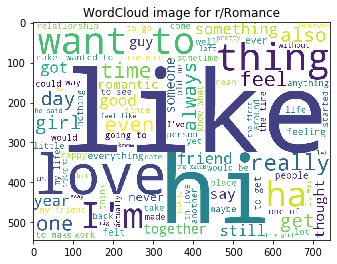

In [173]:
# plot the WordCloud image

plt.figure(figsize = (18, 4))
plt.title("WordCloud image for r/Romance")
plt.imshow(wc_rom);

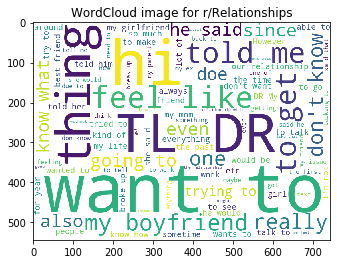

In [174]:
# plot the WordCloud image
plt.figure(figsize = (18, 4))
plt.title("WordCloud image for r/Relationships")
plt.imshow(wc_rel);

Among the top words, there are common words such as "hi" and "thing". Also it seems that the internet acronym 'TL DR' which stands for 'too long, didn't read' is commonly used in the relationship thread. I would add them into my stop word list.

In [175]:
# Add new stop words
stop_w = stopwords.words('english')
newStopWords = ['hi','thing', 'TL', 'DR', 'tl', 'dr']
stop_w.extend(newStopWords)

In [176]:
# Check stop words list
stop_w

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Create a function post_to_words to help with the processing of the words

In [177]:
def post_to_words(post):
    # Function to clean the words
    # The input is a single string 
    # the output is a single string          
   
    # Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", post)
    
    # Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # In Python, searching a set is much faster than searching
    # a list, so convert the stopwords to a set.
    stops = set(stop_w)
    
    # Remove stopwords.
    meaningful_words = [w for w in words if not w in stops]
    
    # Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

I have decided not to stemmatize or lemmatize the words as I would like to retain the meaning of the words when I run a word count for the top 20 words

In [178]:
# Initialize an empty list to hold the clean posts.
clean_rom_posts = []
clean_rel_posts = []

for post in rom_df['selftext']:
    
    # Convert list of posts into a single string
    clean_rom_posts = "".join(post_to_words(post))
    
for post in rel_df['selftext']:
    
    # Convert list of posts into a single string
    clean_rel_posts = "".join(post_to_words(post))

In [179]:
# Check the posts
clean_rom_posts

'got slammed bunch people fetlife calling creep got drunk made ass scared death going lose one best things ever happened idea edit aware ass downvote post maybe giving advice edit girl independently wealthy leave whenever wants way attempt force extort physical contact please read post detail story posted ad free room pretty girl moved things went extremely well got long really well started sex psychological damage history personalities go together really well bi open threesome posted ad fetlife got absolutely destroyed creepy perv personal image issues affected deeply hurt badly pretty much always drink drank blacked apparently flipped girl saying caring people shit even bothered stick head see ok mean know met expecting much stop see ok anyway ended kicking saying mean cold made feel worse care told remember woke next day remembered nothing gone half stuff still looked like left hurry assumed decided creep something left get pretty dark medicate triggered alcohol felt terrible idea h

In [180]:
# Check the posts
clean_rel_posts

'english first language apologies mistakes say shortly family awful girlfriend never actually saying face awful things said led whole lot situations mother criticized eating habits girlfriend likes candy complexed weight guise worry health mother encouraged open eyes women keep open spirit towards relationships finally almost admitted hating words said bs remember exactly moment got surprised jaw dropped first times stammered mother much sweeter sils awful girlfriend got surprised defended time needless say initial shock fights parents time covid forced us make move essential workers parents tried capitalize force us see going get infected bs moved together awful fight parents pretty much cutting financially still studying cutting lot contact get news write call barely acknowledge girlfriend hard grieving fact nice believed since learned girlfriend confided friends parents fine mind heard comments mutual friend asked defend girlfriend father insulted parents front mentioned mother fina

I will now run my 2 strings of text through a tokenizer in order to break up all the words and run a word count

In [181]:
# Instantiate Tokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [182]:
# "Run" Tokenizer
rom_tokens = tokenizer.tokenize(clean_rom_posts)
rel_tokens = tokenizer.tokenize(clean_rel_posts)

In [183]:
# Check the tokens
rom_tokens

['got',
 'slammed',
 'bunch',
 'people',
 'fetlife',
 'calling',
 'creep',
 'got',
 'drunk',
 'made',
 'ass',
 'scared',
 'death',
 'going',
 'lose',
 'one',
 'best',
 'things',
 'ever',
 'happened',
 'idea',
 'edit',
 'aware',
 'ass',
 'downvote',
 'post',
 'maybe',
 'giving',
 'advice',
 'edit',
 'girl',
 'independently',
 'wealthy',
 'leave',
 'whenever',
 'wants',
 'way',
 'attempt',
 'force',
 'extort',
 'physical',
 'contact',
 'please',
 'read',
 'post',
 'detail',
 'story',
 'posted',
 'ad',
 'free',
 'room',
 'pretty',
 'girl',
 'moved',
 'things',
 'went',
 'extremely',
 'well',
 'got',
 'long',
 'really',
 'well',
 'started',
 'sex',
 'psychological',
 'damage',
 'history',
 'personalities',
 'go',
 'together',
 'really',
 'well',
 'bi',
 'open',
 'threesome',
 'posted',
 'ad',
 'fetlife',
 'got',
 'absolutely',
 'destroyed',
 'creepy',
 'perv',
 'personal',
 'image',
 'issues',
 'affected',
 'deeply',
 'hurt',
 'badly',
 'pretty',
 'much',
 'always',
 'drink',
 'drank',
 'b

In [184]:
# Check the tokens
rel_tokens

['english',
 'first',
 'language',
 'apologies',
 'mistakes',
 'say',
 'shortly',
 'family',
 'awful',
 'girlfriend',
 'never',
 'actually',
 'saying',
 'face',
 'awful',
 'things',
 'said',
 'led',
 'whole',
 'lot',
 'situations',
 'mother',
 'criticized',
 'eating',
 'habits',
 'girlfriend',
 'likes',
 'candy',
 'complexed',
 'weight',
 'guise',
 'worry',
 'health',
 'mother',
 'encouraged',
 'open',
 'eyes',
 'women',
 'keep',
 'open',
 'spirit',
 'towards',
 'relationships',
 'finally',
 'almost',
 'admitted',
 'hating',
 'words',
 'said',
 'bs',
 'remember',
 'exactly',
 'moment',
 'got',
 'surprised',
 'jaw',
 'dropped',
 'first',
 'times',
 'stammered',
 'mother',
 'much',
 'sweeter',
 'sils',
 'awful',
 'girlfriend',
 'got',
 'surprised',
 'defended',
 'time',
 'needless',
 'say',
 'initial',
 'shock',
 'fights',
 'parents',
 'time',
 'covid',
 'forced',
 'us',
 'make',
 'move',
 'essential',
 'workers',
 'parents',
 'tried',
 'capitalize',
 'force',
 'us',
 'see',
 'going',
 '

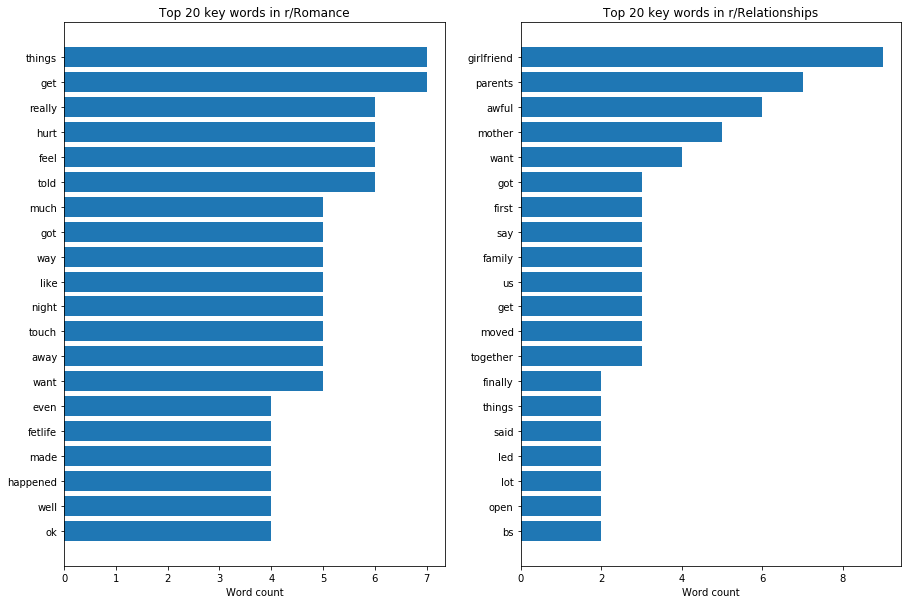

In [185]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

titles = ['Top 20 key words in r/Romance', 'Top 20 key words in r/Relationships']
word_tokens = [rom_tokens, rel_tokens]

fig, ax = plt.subplots(1,2,figsize=(15,10))

for i in range(2):
    
    word_list = word_tokens[i]

    counts = dict(Counter(word_list).most_common(20))

    labels, values = zip(*counts.items())

    # sort your values in descending order
    indSort = np.argsort(values)[::-1]

    # rearrange your data
    labels = np.array(labels)[indSort]
    values = np.array(values)[indSort]

    # add labels
    ax[i].barh(labels, values, align='center')
    ax[i].invert_yaxis()  # labels read top-to-bottom  
    ax[i].set_xlabel('Word count')
    ax[i].set_title(titles[i])

plt.show()

Looking at the top 20 words, there are still common words between the subreddits, such as "things", "got", "get". Other common words such as "well" and "ok" are used more in r/Romance than in r/Relationships. I decided not to add any more stop words as some of the common words may help the model to classify the post correctly. 

# Preprocessing

We will now combine the 2 data sets into a single dataframe, split the data into train and test, then carry out the same cleaning of the words that I did in my EDA.

In [186]:
# Combine the romance and the relationship data for cleaning
combined_df = pd.concat([rom_df, rel_df], axis=0)

In [187]:
# Check the shape
combined_df.shape

(1903, 2)

In [188]:
# Create new column 'label' and use 0s and 1s to represent 'romance' and relationships post respectively
combined_df['label'] = combined_df['subreddit'].map({'romance': 0, 'relationships': 1})

In [189]:
# Check the dataframe
combined_df.head()

,selftext,subreddit,label
0,I am 21 years old and I’ve never been in love....,romance,0
1,I usually don't do this but my heart beats to ...,romance,0
2,I know marriage is not exactly a necessity and...,romance,0
3,I like you— more than your bravery and intelli...,romance,0
4,I could usually go out of my way and flirt or ...,romance,0


In [190]:
# Check the dataframe
combined_df.tail()

,selftext,subreddit,label
974,*Background*\n\nMy mother has mental health is...,relationships,1
975,I am (25M) and my girlfriend and I were talkin...,relationships,1
976,"howdy, my boyfriend and i have been together f...",relationships,1
977,**tl;dr** done with his excuses to not fuck me...,relationships,1
978,"English isn't my first language, apologies for...",relationships,1


In [191]:
# Set train variables X and test variables y
X = combined_df['selftext']
y = combined_df['label']

In [192]:
# Check the baseline score
y.value_counts(normalize=True)

1    0.514451
0    0.485549
Name: label, dtype: float64

We can choose "relationships" as the positive class. Meaning to say, if we were to randomly pick one post from the total posts, there is a 51.4% chance that the post is from r/Relationships. Hence, we can take this as our baseline model.

We can now split our data into train and test using train_test_split and clean X train and X test.

In [193]:
# split the data into train_set and test_set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    stratify = y,
                                                    random_state = 42)

In [194]:
# Check the shape
X_train.shape

(1427,)

In [195]:
# Check the shape
X_test.shape

(476,)

In [196]:
# Initialize an empty list to hold the clean posts.
clean_X_train = []
clean_X_test = []

for post in X_train:
    
    # Clean X train
    clean_X_train.append(post_to_words(post))
    
for post in X_test:
    
    # Clean X test
    clean_X_test.append(post_to_words(post))

In [197]:
# Check X train
clean_X_train[1]

'fantasies involve naked water even dreamiest dreams skinny dipping magical pond last week plane touched freedom spend day however wanted love follow wherever go went nude beach followed little scared ran straight water anyways scared waves scared nakedness still followed always want even go crazy places love feeling water bare breasts exhilarating feeling adoring eyes watching warmed heart knew eyes beach even feel self conscious even care anyone else thinks went farther shore waves would pick ground toes touch sand anymore waves made feel weightless also felt dangerous stayed back feeling scared grabbed hand pulled telling would worth want go anyways slowly happy telling come along adventure always follow love feeling naked ocean completely vulnerably completely free priceless feeling glad got experience together love next morning breakfast talked writing told need take risks poems take someplace dangerous telling vandalize poetry told people like told wade waves away shore would wor

In [198]:
# Check X test
clean_X_test[1]

'guys please elaborate ladies also take part enjoying tails pigs please give insight'

# Modeling

We will use CountVectorizer to transform the text into a matrix to count the number of word occurences.

In [199]:
# Instantiate our CountVectorizer.
cvec = CountVectorizer(max_features=500, stop_words='english')

In [200]:
# Fit our CountVectorizer on the training data and transform training data.
X_train_cvec = pd.DataFrame(cvec.fit_transform(clean_X_train).todense(), columns = cvec.get_feature_names())
# send in data series instead of dataframe

In [201]:
# Check the matrix
X_train_cvec

,able,absolutely,abusive,account,act,acting,actually,advice,age,ago,...,worried,worry,worse,wrong,www,year,years,yes,yesterday,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,2,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,0,0,0,1,0,0,0,3,0,0,...,0,0,0,0,0,2,0,0,0,0
1423,0,0,0,0,0,0,0,3,0,1,...,0,0,0,0,0,0,1,0,0,0
1424,2,0,0,0,0,0,0,1,0,0,...,0,0,3,1,0,0,0,0,0,0
1425,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [202]:
# Transform our testing data with the already-fit CountVectorizer.
X_test_cvec = pd.DataFrame(cvec.transform(clean_X_test).todense(), columns = cvec.get_feature_names())

In [203]:
# Check the matrix
X_test_cvec

,able,absolutely,abusive,account,act,acting,actually,advice,age,ago,...,worried,worry,worse,wrong,www,year,years,yes,yesterday,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,2,0,0,1,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
473,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
474,0,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0


# Choose and fit the model
- Naive Bayes Multinomial
- Logistic Regression

Why I choose these models:
- Naive Bayes Multinomial is probabilistic classifier, therefore it will calculate the probability of each category using Bayes theorem, and the category with the highest probability will be output.<br>
- Logistic regression model builds a regression model to predict the probability that a given data entry belongs to the category numbered as “1”.

## Naive Bayes Multinomial Model

In [204]:
# Instantiate our model!

nb = MultinomialNB(class_prior=[0.5,0.5]) #[prob of neg class, prob of pos class]

In [205]:
# Fit our model!

model = nb.fit(X_train_cvec, y_train)

In [206]:
# Score our model on the training set.

model.score(X_train_cvec, y_train)

0.8766643307638402

In [207]:
# Score our model on the testing set.

model.score(X_test_cvec, y_test)

0.8508403361344538

Results: There is a slight overfitting to our train data. <br>
Accuracy Score on X Test (NMB1) = 0.85 

## Logistic Regression Model

In [208]:
# Instantiate our model!

lr = LogisticRegression()

In [209]:
# Fit our model!

model = lr.fit(X_train_cvec, y_train)

In [210]:
# Score our model on the training set.

model.score(X_train_cvec, y_train)

0.9992992291520673

In [211]:
# Score our model on the testing set.

model.score(X_test_cvec, y_test)

0.9243697478991597

Results: Though it seems to suggest a high overfitting on the train data, however, the model is still able to return a high accuracy score on the test data. <br>
Accuracy score on X test (LR1) = 0.924

# Model improvements

We will use GridSearchCV to see if we can obtain the best hyper parameters in order to improve our models' accuracies

In [213]:
# Let's set a pipeline up with two stages:
# 1. CountVectorizer (transformer)
# 2. Naive Bayes Multinomial (estimator)

pipe_MNB = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB(class_prior=[0.5,0.5]))
    
]
)

# 1. CountVectorizer (transformer)
# 2. LogisticRegression (estimator)
pipe_LR = Pipeline([
    ('cvec', CountVectorizer()),
    ('logreg', LogisticRegression(solver='liblinear', max_iter=200))
    
]
)

In [214]:
# Search over the following values of hyperparameters: (we will use the same hyperparameters for the transformer)
# Maximum number of features fit: 2000, 3000, 4000, 5000
# Minimum number of documents needed to include token: 2, 3
# Maximum number of documents needed to include token: 90%, 95%
# Check (individual tokens) and also check (individual tokens and 2-grams).

pipe_params = {
    'cvec__max_features': [2000,3000,4000,5000],
    'cvec__min_df': [2,3],
    'cvec__max_df': [0.9,0.95],
    'cvec__ngram_range': [(1,1),(1,2)]
}

## Best Multinomial Nayes Bayes model

In [216]:
# Instantiate GridSearchCV for MNB

gs_MNB = GridSearchCV(pipe_MNB, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

In [217]:
# Fit GridSearchCV to training data.
gs_MNB.fit(clean_X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [219]:
# Mean cross-validated score of the best_estimator
gs_MNB.best_score_

0.875953870690713

In [220]:
# Best selected hyperparameters
gs_MNB.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 3000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2)}

In [222]:
# Save best model as gs_model.
gs_model_MNB = gs_MNB.best_estimator_

In [223]:
# Score model on training set.
gs_model_MNB.score(clean_X_train, y_train)

0.9292221443587947

In [224]:
# Score model on testing set.
gs_model_MNB.score(clean_X_test, y_test)

0.8592436974789915

Results: Accuracy score on X test (MNB2) = 0.85, there is no significant improvement from our Accuracy score on X test(MNB1)

## Best Logistic Regression model

In [234]:
gs_LR = GridSearchCV(pipe_LR, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

In [235]:
# Fit GridSearchCV to training data.
gs_LR.fit(clean_X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [229]:
# Mean cross-validated score of the best_estimator
gs_LR.best_score_

0.9200883327199116

In [230]:
# Best selected hyperparameters
gs_LR.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 3000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2)}

In [231]:
# Save best model as gs_model.
gs_model_LR = gs_LR.best_estimator_

In [232]:
# Score model on training set.
gs_model_LR.score(clean_X_train, y_train)

1.0

In [233]:
# Score model on testing set.
gs_model_LR.score(clean_X_test, y_test)

0.9495798319327731

Seem likes the best model overfitted to the train data but still return a high accurracy on the test data.<br>
Results: Accuracy score on X test (LR2) = 0.949, there is a slight improvement from our Accuracy score of X test(LR1) = 0.924

# Results and Evaluation

Our best model is Logistic Regression which returns an accuracy score of 0.949. This means it is able to accurately predict 92.4% the correct subbredit of the post. 

In [243]:
# Generate our predictions!

predictions = gs_model_LR.predict(clean_X_test)

In [245]:
# Import confusion matrix.
from sklearn.metrics import confusion_matrix

# Generate confusion matrix.
# Save TN/FP/FN/TP values.

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [246]:
# Test specificity of our model

spec = tn / (tn + fp)

print(f'Specificity: {round(spec,4)}')

Specificity: 0.9481


The model has a 94.8% chance of correctly classify the post as "r/Romance"

In [247]:
# test sensitivity of our model

sens = tp / (tp + fn)

print(f'Sensitivity: {round(sens,4)}')

Sensitivity: 0.951


The model has a 95.1% chance of correctly classify the post as "r/Relationships"

In [244]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, predictions)

0.9495361781076066

We have a high value of 0.9495 for Receiver Operating Characteristic Area under the ROC Curve (ROC AUC).
If we have an ROC AUC of 1, our positive and negative populations are perfectly separated.

# Conclusion and Recommendations

My model has a 94.96% chance to correctly predict that the post originate from the correct subreddit. <br>

Recommendations to further improve the model:<br>
- Removing more stop words may help to further increase the accuracy of the model
- Lemmatizing or stemmatizing words so that same type of words such as "elected", "election","elected" will be counted as the same word. However, in this project, i have tested and the accuracy was actually worse. Hence, it may work on a case-to-case basis
- Increasing the use number of n-grams from 2-3 words to 4-5 words
- Using Term Frequency-Inverse Document Frequency (TF-IDF) Vectorizer will help to penalize words that appear frequently giving more weightage to words that appear less frequently between the documents